In [2]:
# Import important libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\Velmurugan R\Anaconda_new\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load data set

In [3]:
dta = sm.datasets.fair.load_pandas().data

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Data Analysis and Preparation

In [5]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
# Data exploration
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


## Data Visualization

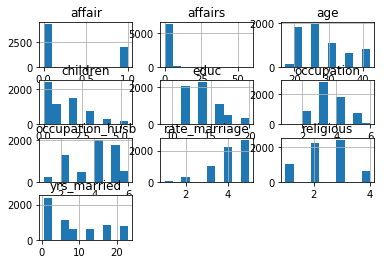

In [30]:
dta.hist()
plt.show()

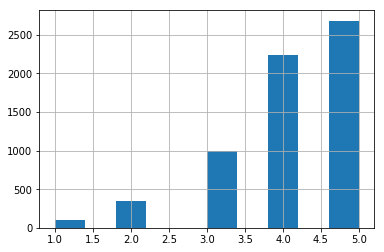

In [11]:
dta.rate_marriage.hist()

Text(0,0.5,'Frequency')

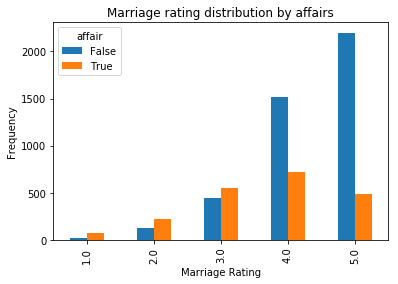

In [12]:
# Data visualization

#plt.hist([score_india, score_pk], color=['orange', 'green'])
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind = 'bar')
plt.title('Marriage rating distribution by affairs')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

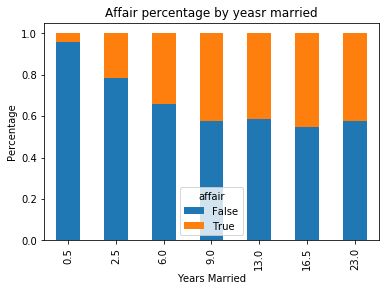

In [14]:
affair_yrs_married = pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True)
plt.title('Affair percentage by yeasr married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [20]:
# Prepare data for logistic Regression
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [21]:
X.head(2)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [22]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [23]:
X.head(2)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [24]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [25]:
X.shape

(6366, 17)

In [26]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [27]:
train_cols = X.columns
train_cols

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [28]:
# Instantiate Logistic Regression model
logit = sm.Logit(dta['affair'],X[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.1365
Time:                        12:26:32   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.534e-222
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9708      0.572      5.192      0.000       1.849       4.092
occ_2             0.3902      0.448      0.872      0.383      -0.487       1.267
occ_3             0.7027      0.441      1.592      0.111      -0.163       1.568
occ_4             0.4714      0.443      1.065      0.287      -0.396       1.339
occ_5             1.0542      0.447      2.360      0.018       0.179       1.930
occ_6             1.1080      0.494      2.242      0.025       0.139       2.077
occ_husb_2        0.1704      0.186      0.916      0.360      -0.194       0.535
occ_husb_3        0.2842      0.202      1.406      0.160      -0.112       0.680
occ_husb_4        0.1428      0.181      0.789      0.430      -0.212       0.498
occ_husb_5        0.1723      0.183      0.944      0.345      -0.186       0.530
occ_husb_6        0.1828      0.204      0.897      0.369      -0.216       0.582
rate_marriage    -0.7102      0.031    -22.560      0.000      -0.772      -0.649
age              -0.0613      0.010     -5.936      0.000      -0.082      -0.041
yrs_married       0.1080      0.011      9.836      0.000       0.086       0.129
children          0.0156      0.032      0.488      0.625      -0.047       0.078
religious        -0.3754      0.035    -10.766      0.000      -0.444      -0.307
educ             -0.0017      0.017     -0.099      0.921      -0.036       0.032
=================================================================================
"""

## Logistic Regression

In [33]:
model = LogisticRegression()
model = model.fit(X,y)
model.score(X,y)

0.7258875274897895

In [35]:
y.mean()

0.3224945020420987

In [38]:
X.columns,np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983589],
        [ 0.18806639],
        [ 0.49894787],
        [ 0.25066856],
        [ 0.83900806],
        [ 0.83390843],
        [ 0.19063594],
        [ 0.29783271],
        [ 0.16140885],
        [ 0.18777091],
        [ 0.19401637],
        [-0.70312336],
        [-0.05841777],
        [ 0.10567654],
        [ 0.01691927],
        [-0.37113627],
        [ 0.0040165 ]]))

In [42]:
# Split data set for Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
model2=LogisticRegression()
model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Predict class labels
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [46]:
#Generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.3514634 , 0.6485366 ],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727385, 0.44272615],
       [0.81207043, 0.18792957],
       [0.74734601, 0.25265399]])

In [47]:
# Generate Evaluation metrics
print(metrics.accuracy_score(Y_test,predicted))
print(metrics.roc_auc_score(Y_test,probs[:,1]))

0.7298429319371728
0.745950606950631


In [ ]:
# The accuaracy still same as we experienced when training and predicting same data

In [48]:
# Confusion matrix
print(metrics.confusion_matrix(Y_test,predicted))
print(metrics.classification_report(Y_test,predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [50]:
# Evaluating model by Cross validation
scores = cross_val_score(LogisticRegression(),X,y, scoring='accuracy',cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [ ]:
# Still gives 73% accuracy

In [56]:
# Predicting probability of an affair (Example which is not in the data set)
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.77472221, 0.22527779]])

In [ ]:
# The probability of an affair is 23% 